Michelle Cronin 

General Assembly - Data Science 

Homework 2 - Pima Indian Diabetes Dataset 

February 8, 2016

In [101]:
# import necessary libraries to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

[Pima Indians Diabetes Dataset Location - UCI](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

## 1) Describe the content of the dataset and its goals

#### Dataset Goals+Content:
- Goal:  To predict diabetes onset within this particular population segment (Pima Indian women -- ages 21+; oldest is 81 years old)
- Within this dataset, 35% of the patients are labeled as having diabetes and 65% are labeled as not.
- From peaking at the top of the file, I learned that it does not have any descriptive headers.
- The website that hosts the dataset also provides additional information on the dataset, such as its headers. I know that the dataset is 768x9 in shape, so the 9 provided attributes fit the 9 columns.
- Each value is separated by a comma
- No missing data as NaNs, but some values appear impossible (i.e. 0 mm for tricep skin thickness) -- this missing value idea is supported by documentation on the dataset's website
- Seems like there might be an outlier in serum_insulin; not sure whether it's okay to remove (sensor or entry error -- or black swan?) -- will keep due to uncertainty

In [102]:
# explore the data:  first at the file level --> first, find the file (pima-indians-diabetes.data.txt)
!ls

README.md                         hw2-Pima-Michelle-Cronin.ipynb    titanic_dropna.csv
hw1-Titanic-Michelle-Cronin.ipynb pima-indians-diabetes.data.txt


In [103]:
# peek at the top of the file (10 rows)
!head -n 10 pima-indians-diabetes.data.txt

6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1


In [104]:
# peek at the end of the file (10 rows)
!tail -n 10 pima-indians-diabetes.data.txt

1,106,76,0,0,37.5,0.197,26,0
6,190,92,0,0,35.5,0.278,66,1
2,88,58,26,16,28.4,0.766,22,0
9,170,74,31,0,44.0,0.403,43,1
9,89,62,0,0,22.5,0.142,33,0
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1
1,93,70,31,0,30.4,0.315,23,0


In [105]:
# import data without headers (so add/create headers)
names = ['preg',
         'pg_conc',
         'diastolic_bp',
         'skin',
         'serum_insulin',
         'bmi',
         'diabetes_pf',
         'age',
         'class']
data = pd.read_csv('pima-indians-diabetes.data.txt', names=names)

In [106]:
# check that dataframe imported in okay
data.head(20)

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [107]:
data.tail(20)

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1


In [108]:
# create a copy in case of mistakes
datac = data.copy()

In [109]:
# explore the data (768 rows; 9 columns)
data.shape

(768, 9)

In [110]:
data.dtypes

preg               int64
pg_conc            int64
diastolic_bp       int64
skin               int64
serum_insulin      int64
bmi              float64
diabetes_pf      float64
age                int64
class              int64
dtype: object

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg             768 non-null int64
pg_conc          768 non-null int64
diastolic_bp     768 non-null int64
skin             768 non-null int64
serum_insulin    768 non-null int64
bmi              768 non-null float64
diabetes_pf      768 non-null float64
age              768 non-null int64
class            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [112]:
# view basic analysis/trends in the data as well as outlier possibilities
data.describe()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


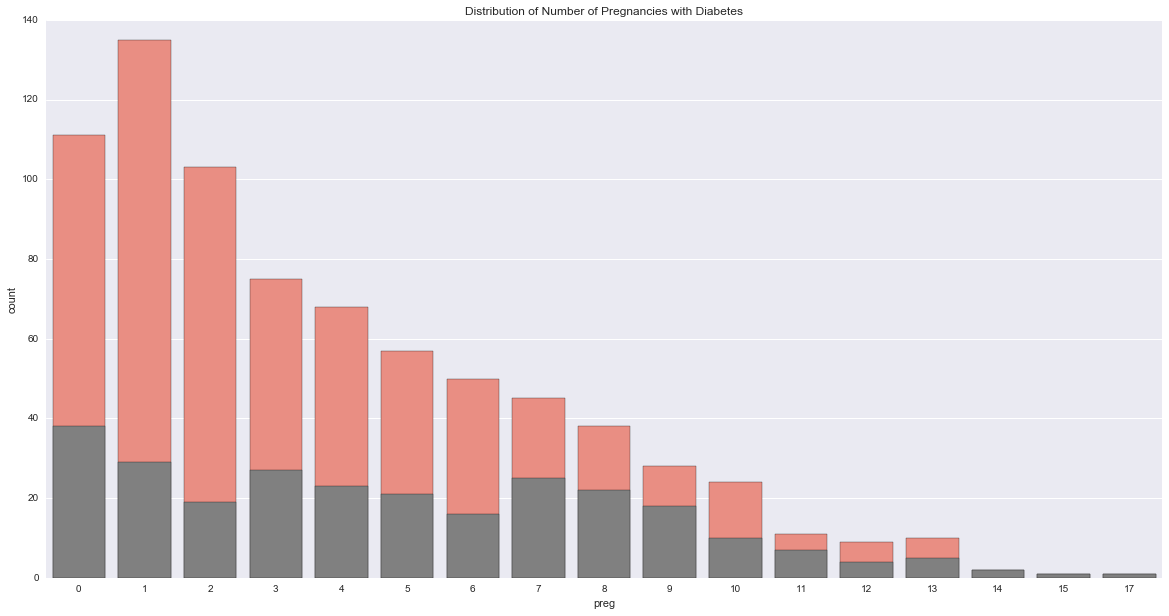

In [113]:
# plot histograms to see distributions + any trends with those diagnosed with diabetes
plt.figure(figsize=(20, 10))
plt.title('Distribution of Number of Pregnancies with Diabetes')
sns.countplot(x=data['preg'], color='Salmon')
sns.countplot(x=data[data['class']==1]['preg'], color='Gray');

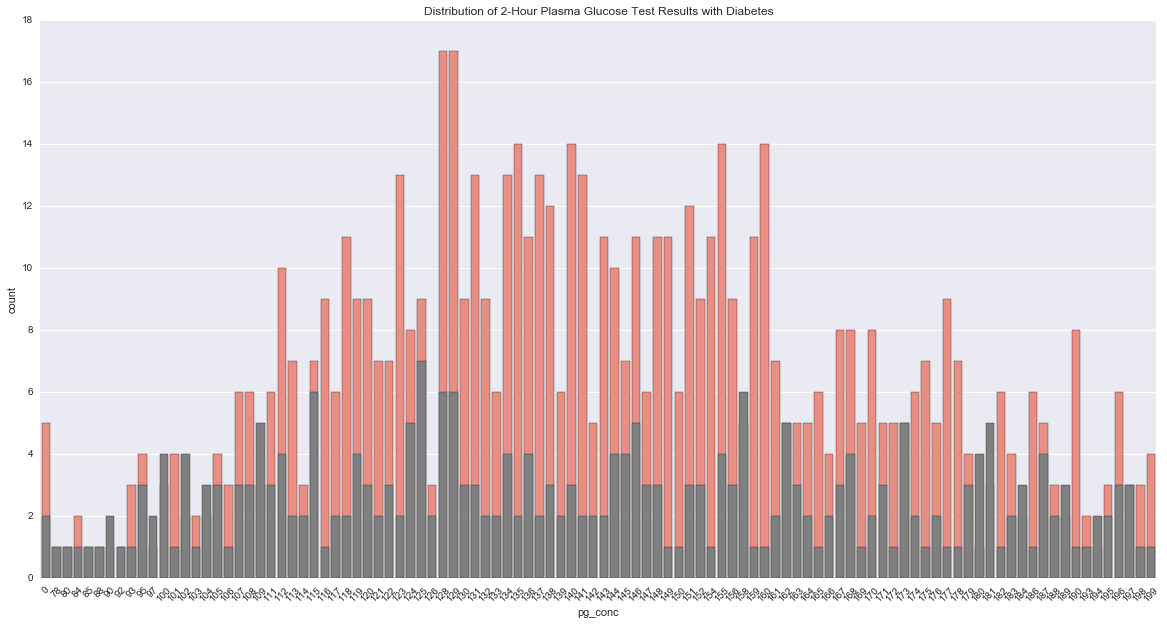

In [114]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of 2-Hour Plasma Glucose Test Results with Diabetes')
sns.countplot(x=data['pg_conc'], color='Salmon')
sns.countplot(x=data[data['class']==1]['pg_conc'], color='Gray')
plt.xticks(rotation=45);

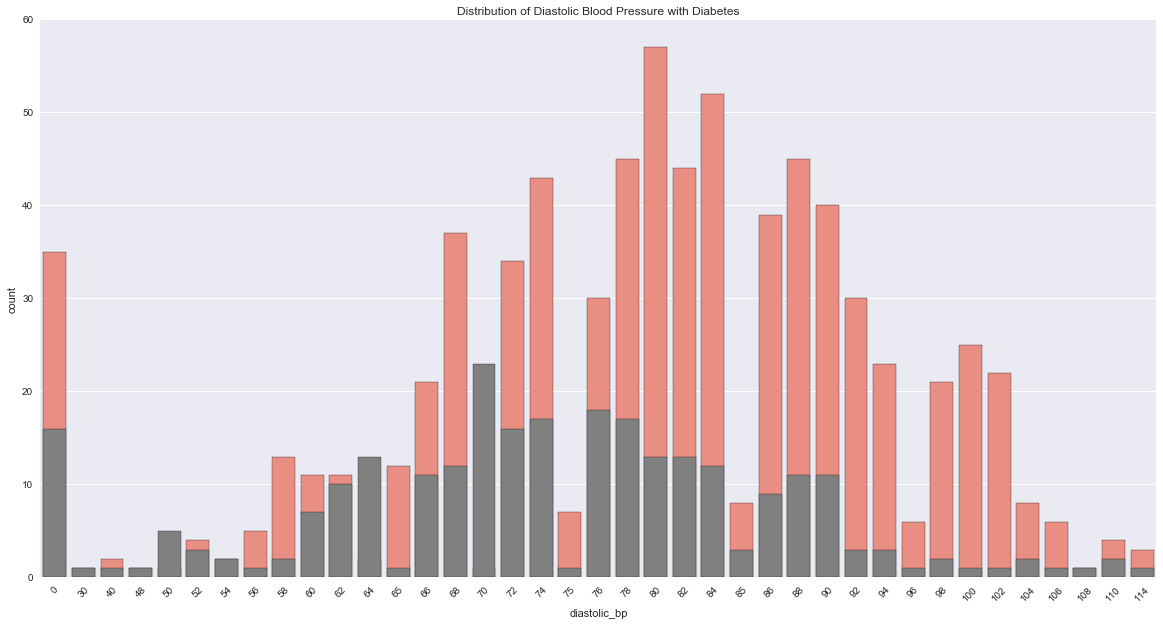

In [115]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Diastolic Blood Pressure with Diabetes')
sns.countplot(x=data['diastolic_bp'], color='Salmon')
sns.countplot(x=data[data['class']==1]['diastolic_bp'], color='Gray')
plt.xticks(rotation=45);

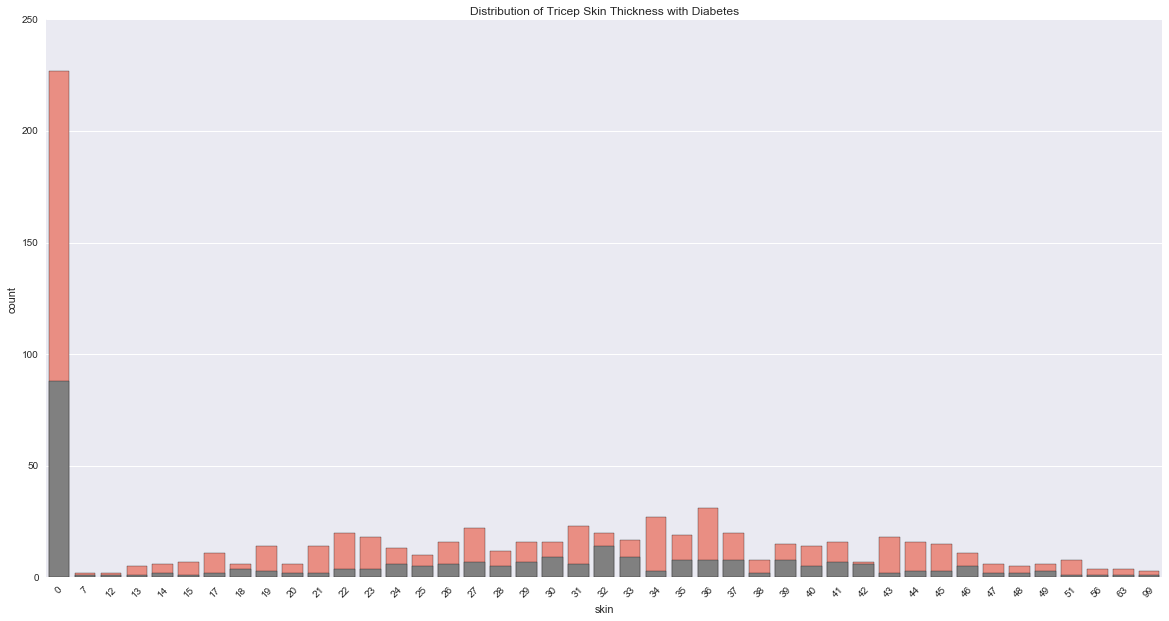

In [116]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Tricep Skin Thickness with Diabetes')
sns.countplot(x=data['skin'], color='Salmon')
sns.countplot(x=data[data['class']==1]['skin'], color='Gray')
plt.xticks(rotation=45);

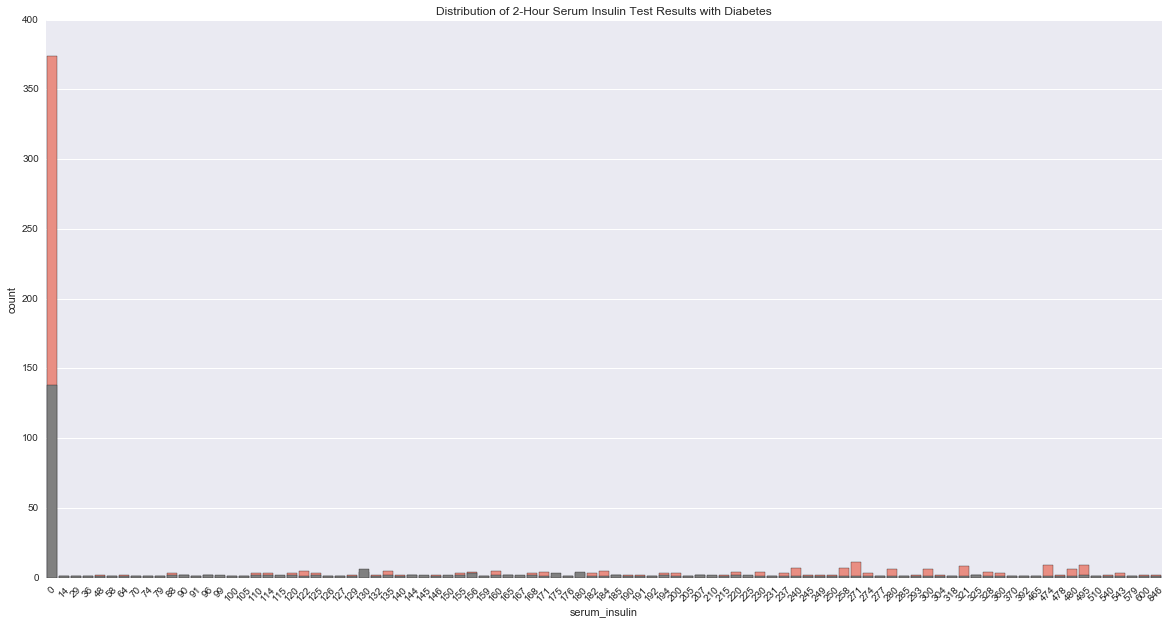

In [117]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of 2-Hour Serum Insulin Test Results with Diabetes')
sns.countplot(x=data['serum_insulin'], color='Salmon')
sns.countplot(x=data[data['class']==1]['serum_insulin'], color='Gray')
plt.xticks(rotation=45);

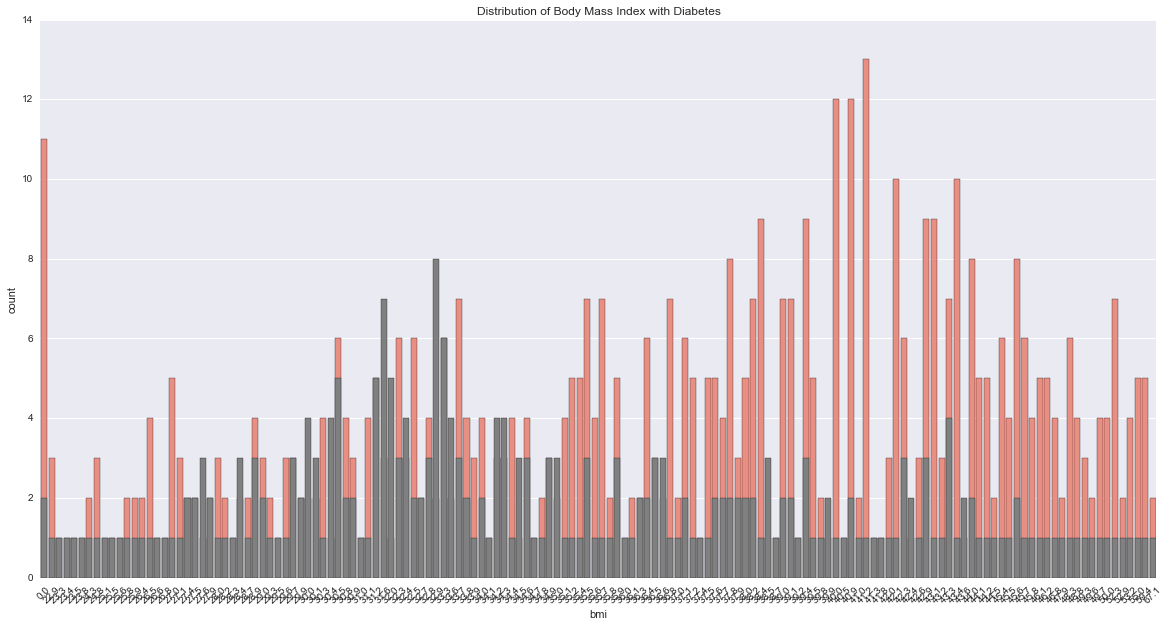

In [118]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Body Mass Index with Diabetes')
sns.countplot(x=data['bmi'], color='Salmon')
sns.countplot(x=data[data['class']==1]['bmi'], color='Gray')
plt.xticks(rotation=45);

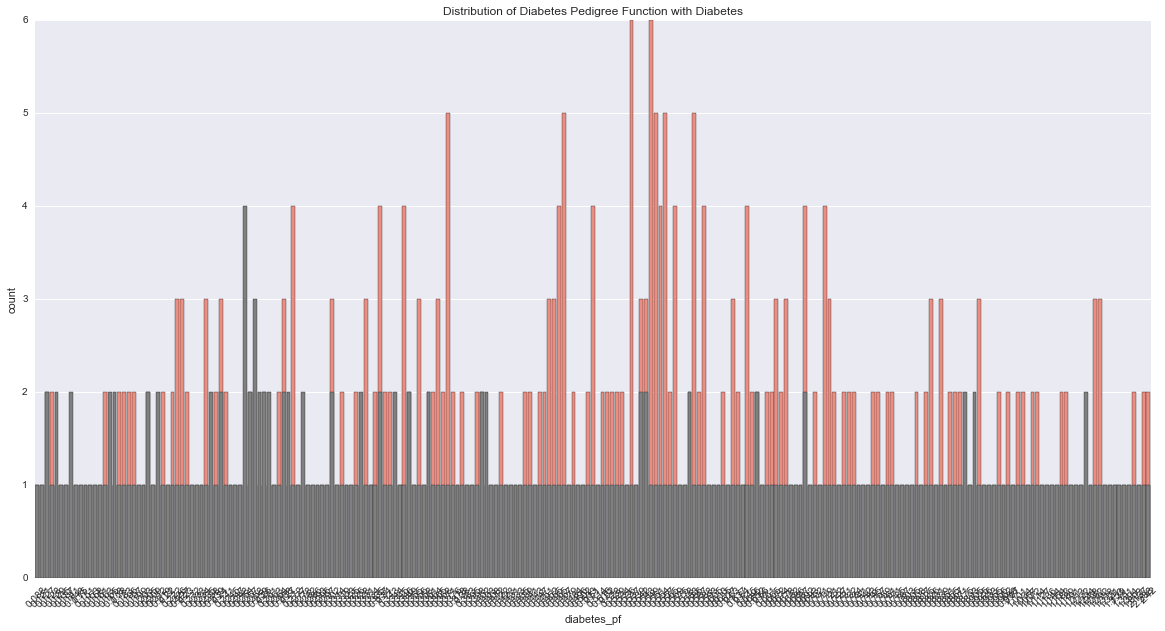

In [119]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Diabetes Pedigree Function with Diabetes')
sns.countplot(x=data['diabetes_pf'], color='Salmon')
sns.countplot(x=data[data['class']==1]['diabetes_pf'], color='Gray')
plt.xticks(rotation=45);

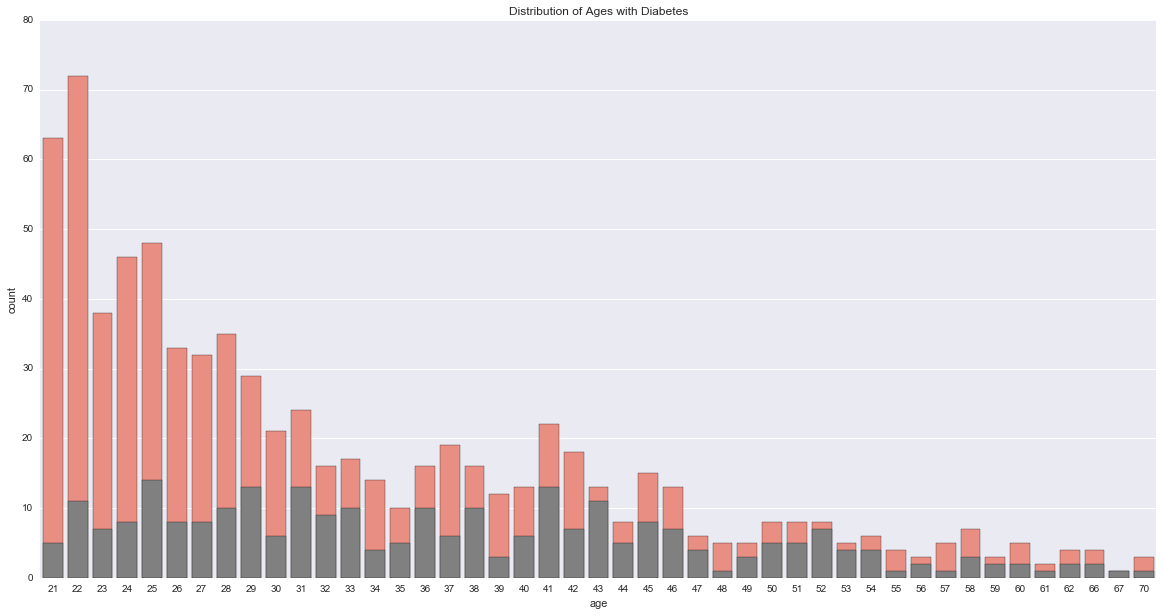

In [120]:
plt.figure(figsize=(20, 10))
plt.title('Distribution of Ages with Diabetes')
sns.countplot(x=data['age'], color='Salmon')
sns.countplot(x=data[data['class']==1]['age'], color='Gray');

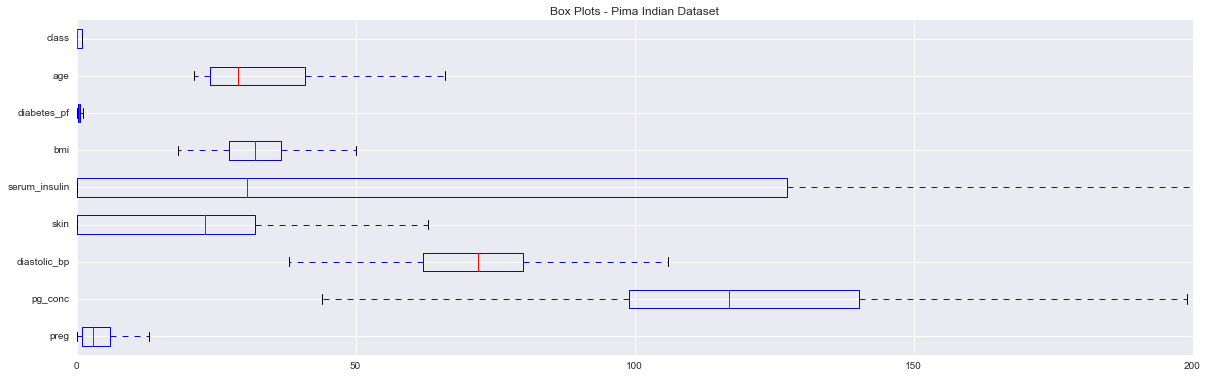

In [121]:
# Plot box and whisker plots to help identify variation/outliers
data.plot(kind='box', vert=False, figsize=(20, 6), xlim=(0, 200), title='Box Plots - Pima Indian Dataset');

## 2) Describe the features and formulate a hypothesis on which might be relevant in predicting diabetes

After [reading](http://www.webmd.com/diabetes/guide/diabetes-basics) a little bit about diabetes, I predict that high glucose levels (pg_conc) and low insulin levels (serum_insulin) should be most relevant in predicting diabetes. Being overweight is a risk factor for Type 2 diabetes (which is more common than any of the other types), so I would also estimate that body mass index (bmi), triceps skin fold thickness (skin), and to perhaps a lesser degree diastolic blood pressure (diastolic_bp) should also be helpful diabetes predictors -- although I would also guess that the first two will be highly correlated. Note that the prevelance in the general population is 9.3% and in seniors is 25.9% (in the USA, in 2012)--much lower than in this population's at the time of the study.
<br><br>
In terms of feature engineering, I think it would be interesting to look at the ratio of plasma glucose concentration to serum insulin after a two-hour test to see if the balance of glucose and insulin in one's blood has an effect on predicting diabetes onset. One obstacle in applying this ratio might be the fact that we are not given the units for the 2-hour plasma glucose concentration test, but I still attempt to take a look at its effect on testing accuracy below.

In [122]:
# Look at how correlated the features are --> not very (age/preg, skin/bmi, and pg_conc/class at ~.5; .7 is threshold)
data.corr()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
pg_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diabetes_pf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Data Dictionary (describes the features):
[reference](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)
<table>
    <tr>
        <td>**Field Name**</td>
        <td>**Type**</td>
        <td>**Description**</td>
    </tr>
    <tr>
        <td>preg</td>
        <td>integer</td>
        <td>Number of times pregnant</td>
    </tr>
    <tr>
        <td>pg_conc</td>
        <td>integer</td>
        <td>Plasma glucose concentration a[t] 2 hours in an oral glucose tolerance test
        <br>(units not given, but maybe mg/dL)</td>
    </tr>
    <tr>
        <td>diastolic_bp</td>
        <td>integer</td>
        <td>Diastolic blood pressure (mm Hg)</td>
    </tr>
    <tr>
        <td>skin</td>
        <td>integer</td>
        <td>Triceps skin fold thickness (mm)</td>
    </tr>
    <tr>
        <td>serum_insulin</td>
        <td>integer</td>
        <td>2-Hour serum insulin (mu U/ml)</td>
    </tr>
    <tr>
        <td>bmi</td>
        <td>float</td>
        <td>Body mass index (weight in kg/(height in m)^2)</td>
    </tr>
    <tr>
        <td>diabetes_pf</td>
        <td>float</td>
        <td>Diabetes pedigree function</td>
    </tr>
    <tr>
        <td>age</td>
        <td>integer</td>
        <td>Age (years)</td>
    </tr>
    <tr>
        <td>class</td>
        <td>integer (0 or 1)</td>
        <td>Class variable (0 to signify no diabetes or 1 to signify diabetes)</td>
    </tr>
    <tr>
        <td>ratio</td>
        <td>float</td>
        <td>New feature I created, tested in one of the dataframes (datar):  pg_conc/serum_insulin
        <br>Ratio of plasma glucose in blood after two hour test to serum insulin after two hour test
        <br>(see end of Heading 3 for creation)</br>
        </td>
    </tr>
</table>
        
        



## 3) Describe the missing/NULL values. Decide if you should impute or drop them and justify your choice.

As established above, the missing/NULL values are ones encoded as "0" in places where it is biologically impossible to read as such (i.e. skin thickness, body mass index, etc.). Scanning through each feature, "0" should therefore represent a missing value in each of the columns except in number of times pregnant (preg) as it is possible for a woman to have never become pregnant and in class variable (class) as it is a binary classifier. Note that for those latter features, as "0" is a very possible data point, it is impossible for me to know if there are any missing values encoded as "0" there or actual entries listed as "0". But for the sake of having more data rather than less, I am going to err on the side of actual data for the purpose of this exercise.

After replacing the "0"s with NaNs and analyzing which columns have missing values, I dropped some rows and imputed others. Body Mass Index (bmi) and plasma glucose concentration (pg_conc) comprise such a small amout of data that it should be okay to drop (under 2%).

The dataframe yielded similar stats when I compared its values with diastolic bloop pressure (diastolic_bp)'s missing values and without. So I imputed diastolic_bp's missing values with its median. I followed the same process with trifold skin thickness (skin).

The two-hour insulin test (serum_insulin) has significantly more missing data, at almost 49%. This is very close to the 50% threshold rule of thumb for dropping a column of data. So I am going to test two versions:  one with serum_insulin dropped completely and one with its missing values imputed as its median to see which performs better.

In [123]:
# Replace missing value "0" with NaN in each column except preg and class
data[['pg_conc', 'diastolic_bp', 'skin', 'serum_insulin', 'bmi', 'diabetes_pf', 'age']] = data[['pg_conc', 'diastolic_bp', 'skin', 'serum_insulin', 'bmi', 'diabetes_pf', 'age']].replace(to_replace='0', value=np.nan)

In [124]:
data.head()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg             768 non-null int64
pg_conc          763 non-null float64
diastolic_bp     733 non-null float64
skin             541 non-null float64
serum_insulin    394 non-null float64
bmi              757 non-null float64
diabetes_pf      768 non-null float64
age              768 non-null int64
class            768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [126]:
# create a dataframe of calculations of missing data for each column
md = {'preg' : [0/768.0],
         'pg_conc' : [5/768.0],
         'diastolic_bp': [35/768.0],
         'skin': [227/768.0],
         'serum_insulin': [374/768.0],
         'bmi': [11/768.0],
         'diabetes_pf': [0/768.0],
         'age': [0/768.0],
         'class': [0/768.0]}

missing = pd.DataFrame(md)
missing

,age,bmi,class,diabetes_pf,diastolic_bp,pg_conc,preg,serum_insulin,skin
0,0,0.014323,0,0,0.045573,0.00651,0,0.486979,0.295573


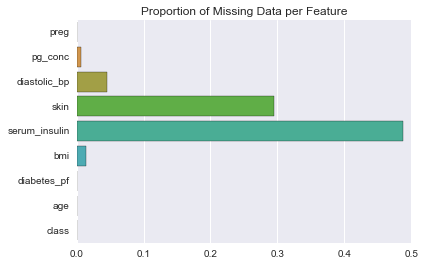

In [127]:
# graph the missing data
plt.title('Proportion of Missing Data per Feature')
sns.barplot(data=missing, ci=None, orient='h', order=data.columns);

In [128]:
# look at data where diastolic_bp is missing
data.loc[data['diastolic_bp'].isnull(),:].describe()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
count,35.000000,35.000000,0,2.000000,0,28.000000,35.000000,35.000000,35.000000
mean,3.628571,117.800000,NaN,26.500000,NaN,32.132143,0.388429,30.714286,0.457143
std,3.646801,27.488821,NaN,4.949747,NaN,8.029393,0.254266,9.820661,0.505433
min,0.000000,73.000000,NaN,23.000000,NaN,19.600000,0.102000,21.000000,0.000000
25%,0.000000,97.500000,NaN,24.750000,NaN,26.925000,0.197500,24.500000,0.000000
50%,2.000000,117.000000,NaN,26.500000,NaN,30.000000,0.282000,28.000000,0.000000
75%,6.000000,133.500000,NaN,28.250000,NaN,36.850000,0.573500,34.000000,1.000000
max,13.000000,183.000000,NaN,30.000000,NaN,52.300000,0.933000,72.000000,1.000000


In [129]:
# look at data where diastolic_bp is not missing --> the two are similar enough except at serum_insulin
data.loc[data['diastolic_bp'].notnull(),:].describe()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
count,733.000000,728.000000,733.000000,539.000000,394.000000,729.000000,733.000000,733.000000,733.000000
mean,3.855389,121.873626,72.405184,29.163265,155.548223,32.469959,0.475861,33.361528,0.343793
std,3.358106,30.679207,12.382158,10.493017,118.775855,6.885098,0.334179,11.837077,0.475297
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,22.000000,76.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.380000,29.000000,0.000000
75%,6.000000,141.250000,80.000000,36.000000,190.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [130]:
# fill in diastolic_bp missing values with its median value
dbp_median = data['diastolic_bp'].median()
data['diastolic_bp'].fillna(dbp_median, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg             768 non-null int64
pg_conc          763 non-null float64
diastolic_bp     768 non-null float64
skin             541 non-null float64
serum_insulin    394 non-null float64
bmi              757 non-null float64
diabetes_pf      768 non-null float64
age              768 non-null int64
class            768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [131]:
# look at data where skin is missing
data.loc[data['skin'].isnull(),:].describe()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
count,227.000000,227.000000,227.000000,0,0,218.000000,227.000000,227.000000,227.000000
mean,4.638767,123.449339,74.585903,NaN,NaN,31.373853,0.393291,37.251101,0.387665
std,3.350062,29.572931,11.421737,NaN,NaN,6.952505,0.276871,13.062933,0.488294
min,0.000000,44.000000,48.000000,NaN,NaN,18.200000,0.078000,21.000000,0.000000
25%,2.000000,105.000000,68.000000,NaN,NaN,25.925000,0.203000,27.000000,0.000000
50%,4.000000,120.000000,72.000000,NaN,NaN,30.850000,0.282000,34.000000,0.000000
75%,7.000000,140.500000,80.000000,NaN,NaN,35.300000,0.536500,45.000000,1.000000
max,13.000000,197.000000,122.000000,NaN,NaN,52.900000,1.781000,72.000000,1.000000


In [132]:
# look at data where skin is not missing --> the two are similar enough except at serum_insulin... again...
data.loc[data['skin'].notnull(),:].describe()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
count,541.000000,536.000000,541.000000,541.000000,394.000000,539.000000,541.000000,541.000000,541.000000
mean,3.512015,120.940299,71.463956,29.153420,155.548223,32.895733,0.504850,31.558226,0.332717
std,3.324759,30.931159,12.261997,10.476982,118.775855,6.871851,0.346639,10.743768,0.471622
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,76.250000,27.850000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,125.000000,32.800000,0.417000,28.000000,0.000000
75%,5.000000,141.000000,80.000000,36.000000,190.000000,36.900000,0.660000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [133]:
# fill in skin missing values with its median value
skin_median = data['skin'].median()
data['skin'].fillna(skin_median, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg             768 non-null int64
pg_conc          763 non-null float64
diastolic_bp     768 non-null float64
skin             768 non-null float64
serum_insulin    394 non-null float64
bmi              757 non-null float64
diabetes_pf      768 non-null float64
age              768 non-null int64
class            768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [134]:
# look at data where serum_insulin is missing
data.loc[data['serum_insulin'].isnull(),:].describe()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
count,374.000000,370.000000,374.000000,374.000000,0,364.000000,374.000000,374.000000,374.000000
mean,4.433155,120.700000,74.211230,29.109626,NaN,31.793407,0.415340,35.796791,0.368984
std,3.437621,30.238604,11.425984,6.531940,NaN,6.763519,0.300547,12.729034,0.483176
min,0.000000,44.000000,44.000000,8.000000,NaN,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.250000,68.000000,29.000000,NaN,26.800000,0.209000,25.000000,0.000000
50%,4.000000,115.000000,72.000000,29.000000,NaN,31.200000,0.302500,32.000000,0.000000
75%,7.000000,138.000000,80.000000,29.000000,NaN,35.725000,0.553250,43.000000,1.000000
max,14.000000,199.000000,122.000000,99.000000,NaN,52.900000,1.893000,72.000000,1.000000


In [135]:
# look at data where serum_insulin is not missing --> mostly similar, with more variance in diabetes_pf and age
data.loc[data['serum_insulin'].notnull(),:].describe()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class
count,394.000000,393.000000,394.000000,394.000000,394.000000,393.000000,394.000000,394.000000,394.000000
mean,3.286802,122.615776,70.654822,29.106599,155.548223,33.072519,0.525543,30.814721,0.329949
std,3.209635,30.822276,12.469919,10.504273,118.775855,7.023947,0.350127,10.198971,0.470792
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.400000,0.270250,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [136]:
# fill in serum_insulin missing values with its median value
si_median = data['serum_insulin'].median()
data['serum_insulin'].fillna(si_median, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg             768 non-null int64
pg_conc          763 non-null float64
diastolic_bp     768 non-null float64
skin             768 non-null float64
serum_insulin    768 non-null float64
bmi              757 non-null float64
diabetes_pf      768 non-null float64
age              768 non-null int64
class            768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


In [137]:
# remove the less than 2% missing value rows of pg_conc and bmi; save as a new dataframe
all_data = data.dropna()
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 9 columns):
preg             752 non-null int64
pg_conc          752 non-null float64
diastolic_bp     752 non-null float64
skin             752 non-null float64
serum_insulin    752 non-null float64
bmi              752 non-null float64
diabetes_pf      752 non-null float64
age              752 non-null int64
class            752 non-null int64
dtypes: float64(6), int64(3)
memory usage: 58.8 KB


In [138]:
# create dataframe that contains new ratio feature
datar = all_data.copy()
datar['ratio'] = datar['pg_conc']/datar['serum_insulin']
datar.head()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class,ratio
0,6,148,72,35,125,33.6,0.627,50,1,1.184000
1,1,85,66,29,125,26.6,0.351,31,0,0.680000
2,8,183,64,29,125,23.3,0.672,32,1,1.464000
3,1,89,66,23,94,28.1,0.167,21,0,0.946809
4,0,137,40,35,168,43.1,2.288,33,1,0.815476


In [139]:
datar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 10 columns):
preg             752 non-null int64
pg_conc          752 non-null float64
diastolic_bp     752 non-null float64
skin             752 non-null float64
serum_insulin    752 non-null float64
bmi              752 non-null float64
diabetes_pf      752 non-null float64
age              752 non-null int64
class            752 non-null int64
ratio            752 non-null float64
dtypes: float64(7), int64(3)
memory usage: 64.6 KB


In [140]:
# create a dataframe without serum_insulin
data_small = all_data.drop(['serum_insulin'], axis=1)

In [141]:
data_small.head()

,preg,pg_conc,diastolic_bp,skin,bmi,diabetes_pf,age,class
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,29,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1


Note that now I have three dataframes I will be testing:
- all_data - all of the original features, with median-imputed data for most missing values (bmi and pg_conc missing values were dropped) [1]
- datar - same as all_data, but with the addition of the ratio feature [2]
- data_small - same as all_data, except with the serum_insulin column dropped [3]

In [142]:
# Now that I have created a new feature, I want to see how correlated it is to the others --> nope!
datar.corr()

,preg,pg_conc,diastolic_bp,skin,serum_insulin,bmi,diabetes_pf,age,class,ratio
preg,1.000000,0.125717,0.205104,0.077887,0.023044,0.018352,-0.029159,0.545238,0.213371,-0.051533
pg_conc,0.125717,1.000000,0.220129,0.193570,0.420346,0.232771,0.133945,0.261490,0.494190,0.052573
diastolic_bp,0.205104,0.220129,1.000000,0.191545,0.045578,0.280419,0.000091,0.320406,0.162308,-0.003307
skin,0.077887,0.193570,0.191545,1.000000,0.154164,0.541981,0.104627,0.123297,0.211854,-0.003612
serum_insulin,0.023044,0.420346,0.045578,0.154164,1.000000,0.179990,0.129163,0.095388,0.203664,-0.461425
bmi,0.018352,0.232771,0.280419,0.541981,0.179990,1.000000,0.153683,0.022144,0.309884,0.002938
diabetes_pf,-0.029159,0.133945,0.000091,0.104627,0.129163,0.153683,1.000000,0.031674,0.178052,0.095576
age,0.545238,0.261490,0.320406,0.123297,0.095388,0.022144,0.031674,1.000000,0.232734,-0.060497
class,0.213371,0.494190,0.162308,0.211854,0.203664,0.309884,0.178052,0.232734,1.000000,-0.003126
ratio,-0.051533,0.052573,-0.003307,-0.003612,-0.461425,0.002938,0.095576,-0.060497,-0.003126,1.000000


## 4) Come up with a benchmark for the minimum performance that an algorithm should have on this dataset

65% is the benchmark for minimum performance.

In [143]:
# Count of non-diabetes (versus diabetes) divided by amount of rows to determine benchmark for minimum performance
all_data['class'].value_counts().head(1) / len(all_data['class'])

0    0.648936
Name: class, dtype: float64

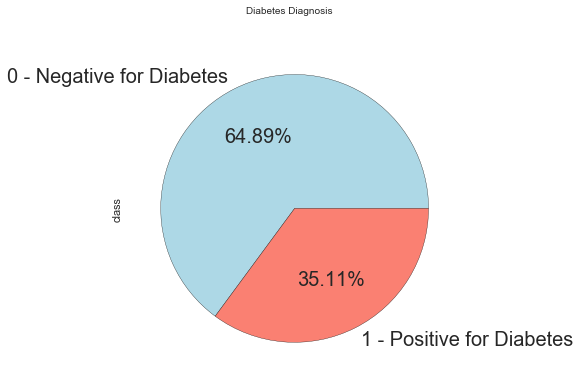

In [144]:
# visualization of the above
all_data['class'].value_counts().plot(title='Diabetes Diagnosis', subplots=True, kind='pie', autopct='%.2f%%', colors=['LightBlue', 'Salmon'], 
                                      fontsize=20, labels=['0 - Negative for Diabetes', '1 - Positive for Diabetes'], figsize=(6,6));

In [145]:
# Assign data to X and y (3x for each dataset I wish to test)
y1 = all_data['class']
y2 = datar['class']
y3 = data_small['class']

X1 = all_data.drop('class', axis=1)
X2 = datar.drop('class', axis=1)
X3 = data_small.drop('class', axis=1)

In [146]:
# break up the data into test and training sets:
from sklearn.cross_validation import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=1)

In [147]:
# 20% test / 80% train / 10 cross validation iterations 
from sklearn.cross_validation import ShuffleSplit
cv1 = ShuffleSplit(X_train1.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv2 = ShuffleSplit(X_train2.shape[0], n_iter=10, test_size=0.2, random_state=0)
cv3 = ShuffleSplit(X_train3.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [148]:
# standardization for models that use euclidian distances
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform training features
X_train_std1 = stdsc.fit_transform(X_train1)
# transform the testing features in the same way
X_test_std1 = stdsc.transform(X_test1)

X_train_std2 = stdsc.fit_transform(X_train2)
X_test_std2 = stdsc.transform(X_test2)

X_train_std3 = stdsc.fit_transform(X_train3)
X_test_std3 = stdsc.transform(X_test3)

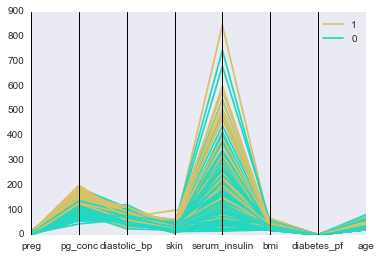

In [149]:
# take a look at the features plotted for those with/without diabetes + how they change for each set
plt.figure()
pd.tools.plotting.parallel_coordinates(all_data, 'class');

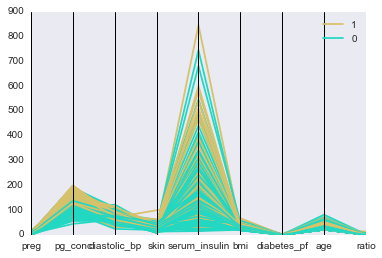

In [150]:
plt.figure()
pd.tools.plotting.parallel_coordinates(datar, 'class');

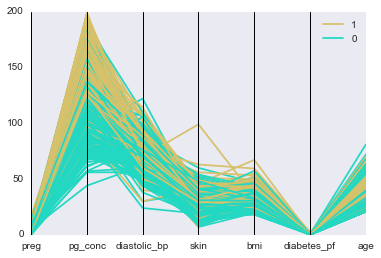

In [151]:
plt.figure()
pd.tools.plotting.parallel_coordinates(data_small, 'class');

## 5) What's the best performance you can get with kNN? Is kNN a good choice for this dataset?

- Best Accuracy:  (1) 76.16% with datar (2) 74.83% with all_data (3) 73.51% with data_small
- Speed: (1) 1.91 ms per loop with all_data (2) 2.02 ms per loop with datar (3) 12 ms per loop with data_small
- Tested: datar
- Interpretability: This model is easy to explain, so interpretibility is very good!
<br><br>
**Is kNN a good choice for this dataset?** Yes, this model is a good choice for this dataset since we are not predicting a continuous number but instead a category (1 or 0 representing 'Yes-Diabetes' or 'No Diabetes') and we only have 7-8 (depending on the dataframe) features (plus one label column). The performance is better than our benchmark, although the learning curves reveal bias and variance.

In [152]:
# import and create classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [153]:
# gridsearch for hyperparameters
from sklearn.grid_search import GridSearchCV
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf1 = GridSearchCV(knn, parameters, cv=cv1)
clf1.fit(X_train_std1, y_train1)

GridSearchCV(cv=ShuffleSplit(601, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [154]:
# get best performing combo
clf1.best_params_

{'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}

In [155]:
# average of cross validation scores
clf1.best_score_

0.76528925619834709

In [156]:
# estimator params
clf1.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=13, p=2, weights='uniform')

In [157]:
# storing results for comparison for all_data
best_knn1 = clf1.best_estimator_

In [158]:
# repeating process for datar
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf2 = GridSearchCV(knn, parameters, cv=cv2)
clf2.fit(X_train_std2, y_train2)

GridSearchCV(cv=ShuffleSplit(601, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [159]:
# get best performing combo - datar
clf2.best_params_

{'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

In [160]:
clf2.best_score_

0.76776859504132233

In [161]:
# estimator params
clf2.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=11, p=2, weights='uniform')

In [162]:
# storing results for comparison for datar
best_knn2 = clf2.best_estimator_

In [163]:
# repeating process for data_small
parameters = {'n_neighbors': range(1,30), 'weights': ['uniform', 'distance'],
             'p': range(1,4)}
clf3 = GridSearchCV(knn, parameters, cv=cv3)
clf3.fit(X_train_std3, y_train3)

GridSearchCV(cv=ShuffleSplit(601, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance'], 'p': [1, 2, 3]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [164]:
# get best performing combo - data_small
clf3.best_params_

{'n_neighbors': 14, 'p': 3, 'weights': 'uniform'}

In [165]:
clf3.best_score_

0.76942148760330575

In [166]:
# estimator params
clf3.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=14, p=3, weights='uniform')

In [167]:
# storing results for comparison for data_small
best_knn3 = clf3.best_estimator_

In [168]:
# compare the accuracy of each of the three:
# all_data
best_knn1.score(X_test_std1, y_test1)

0.7483443708609272

In [169]:
# timing - all_data
%timeit best_knn1.predict(X_test_std1)

100 loops, best of 3: 2.06 ms per loop


In [170]:
# datar
best_knn2.score(X_test_std2, y_test2)

0.76158940397350994

In [171]:
# timing - datar
%timeit best_knn2.predict(X_test_std2)

100 loops, best of 3: 2.2 ms per loop


In [172]:
#data_small
best_knn3.score(X_test_std3, y_test3)

0.73509933774834435

In [173]:
# timing - data_small
%timeit best_knn3.predict(X_test_std3)

100 loops, best of 3: 11.8 ms per loop


In [174]:
# get ready to plot learning curves
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(best_knn2, X_train_std2, y_train2, cv=cv2)

(array([ 48, 156, 264, 372, 480]),
 array([[ 0.83333333,  0.8125    ,  0.72916667,  0.8125    ,  0.6875    ,
          0.70833333,  0.625     ,  0.75      ,  0.8125    ,  0.85416667],
        [ 0.82692308,  0.76282051,  0.73076923,  0.80128205,  0.77564103,
          0.76923077,  0.78205128,  0.77564103,  0.74358974,  0.75      ],
        [ 0.79924242,  0.80681818,  0.78409091,  0.8030303 ,  0.8030303 ,
          0.79166667,  0.79545455,  0.78409091,  0.77272727,  0.78030303],
        [ 0.80913978,  0.79301075,  0.7983871 ,  0.81451613,  0.81182796,
          0.80376344,  0.78763441,  0.80913978,  0.80107527,  0.80107527],
        [ 0.81666667,  0.78958333,  0.80208333,  0.79791667,  0.7875    ,
          0.80625   ,  0.80416667,  0.80625   ,  0.80833333,  0.80416667]]),
 array([[ 0.75206612,  0.78512397,  0.78512397,  0.67768595,  0.67768595,
          0.70247934,  0.7107438 ,  0.72727273,  0.70247934,  0.69421488],
        [ 0.76859504,  0.75206612,  0.76033058,  0.69421488,  0.70247

In [175]:
def plot_learning_curve(estimator, title, X2, y2, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X2 : our training dataframe

    y2 : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv2 (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=cv2, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

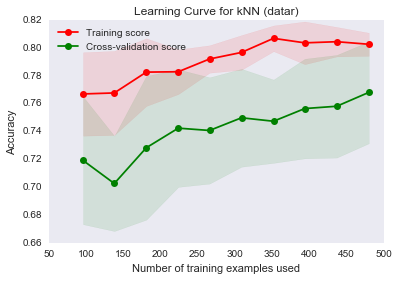

In [176]:
plot_learning_curve(best_knn2, 'Learning Curve for kNN (datar)', X_train_std2, y_train2, cv=cv2);

## 6) What's the best performance you can get with Naive Bayes? Is NB a good choice for this dataset?

- Best Accuracy:  70.25%
- Speed: 79.7 microsec
- Tested: Only did vectorization for pg_conc
- Interpretability: This model can be moderately easy to explain, but is usually used for textual analysis. So I feel like it would be difficult to explain why and how it was used in this particular situation (and that includes the other NB varieties).
<br><br>
**Is NB a good choice for this dataset?** No, because part of how it works is by detecting the frequency of a word (the multinomial NB that I used; others can detect the absence of a word or normal distribution; maybe that one, Gaussian, would be somewhat more relevant in this case). This data is composed of numbers (test results), first of all, and contains several dimensions--making it a poor candidate. Features have some correlation, while this model assumes feature indepenence. The learning curves show tons of bias and maybe some variance although the line for training is a bit jagged. However, it did perform a few points better than benchmark and is fast.

In [177]:
# convert all to strings
SX_train1 = X_train1.astype(str)

In [178]:
SX_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 97 to 38
Data columns (total 8 columns):
preg             601 non-null object
pg_conc          601 non-null object
diastolic_bp     601 non-null object
skin             601 non-null object
serum_insulin    601 non-null object
bmi              601 non-null object
diabetes_pf      601 non-null object
age              601 non-null object
dtypes: object(8)
memory usage: 42.3+ KB


In [179]:
# vectorize
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(decode_error='ignore')
vect.fit(SX_train1[['preg', 'pg_conc', 'diastolic_bp', 'skin', 'serum_insulin', 'bmi', 'diabetes_pf', 'age']])
vect_trans1 = vect.transform(SX_train1[['preg', 'pg_conc', 'diastolic_bp', 'skin', 'serum_insulin', 'bmi', 'diabetes_pf', 'age']])
vect_trans1.toarray()

array([[0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]])

In [180]:
# place into dataframe
nb_df1 = pd.DataFrame(vect_trans1.toarray())

In [181]:
# this looks bad, but this is probably a really bad model for this type of thing; 
# maybe would work better with only one feature?
nb_df1.head(50)

,0,1,2,3,4,5,6,7
0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0
7,1,0,0,0,0,0,0,0


In [182]:
# let's try with pg_conc, which Random Forest says is the most important predictive feature and had high correlation to class
vect = CountVectorizer(decode_error='ignore')
vect.fit(SX_train1.pg_conc)
vect_trans1again = vect.transform(SX_train1.pg_conc)
vect_trans1again.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [183]:
# place into dataframe
nb_df1again = pd.DataFrame(vect_trans1again.toarray())

In [184]:
# better, but kind of meaningless since we don't need/can't get a word list 
# not doing this for the others
nb_df1again.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 600
Columns: 130 entries, 0 to 129
dtypes: int64(130)
memory usage: 615.1 KB


In [185]:
# make our y column and label_key to reference later
nb_df1again['class'] = pd.factorize(y_train1)[0]
label_key = pd.factorize(y_train1)[1]

In [186]:
nb_df1again.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
nb_df1again.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 0 to 600
Columns: 131 entries, 0 to class
dtypes: int64(131)
memory usage: 619.8 KB


In [188]:
# set our X and y
ynb, Xnb = nb_df1again['class'], nb_df1again.drop(['class'], axis=1)

In [189]:
# test and train the data
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(Xnb, ynb, 
                                                    test_size=0.2, random_state=1)

In [190]:
# set up cross validation
cv_nb = ShuffleSplit(Xnb_train.shape[0], n_iter=10, test_size=0.2, random_state=0)

In [191]:
# check best params for all_data
from sklearn.naive_bayes import MultinomialNB

parameters = {'alpha': np.linspace(1e-4, 1, 10)}
nbayes = MultinomialNB()
clf_nb1 = GridSearchCV(nbayes, parameters, cv=cv_nb)
clf_nb1.fit(Xnb_train, ynb_train)

GridSearchCV(cv=ShuffleSplit(480, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.11200e-01,   2.22300e-01,   3.33400e-01,
         4.44500e-01,   5.55600e-01,   6.66700e-01,   7.77800e-01,
         8.88900e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [192]:
clf_nb1.best_params_

{'alpha': 1.0}

In [255]:
clf_nb1.best_score_

0.65312499999999996

In [193]:
clf_nb1.best_estimator_

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [194]:
best_nb1 = clf_nb1.best_estimator_

In [195]:
best_nb1.score(Xnb_test, ynb_test)

0.7024793388429752

In [196]:
# timing for all_data
%timeit best_nb1.predict(Xnb_test)

The slowest run took 9.57 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 75.5 µs per loop


In [197]:
# get ready to plot learning curves
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(nbayes, Xnb_train, ynb_train, cv=cv_nb)

(array([ 38, 124, 211, 297, 384]),
 array([[ 1.        ,  0.92105263,  0.73684211,  0.92105263,  0.97368421,
          0.73684211,  0.94736842,  0.81578947,  0.97368421,  0.73684211],
        [ 0.86290323,  0.88709677,  0.81451613,  0.87096774,  0.87096774,
          0.83870968,  0.87903226,  0.86290323,  0.88709677,  0.86290323],
        [ 0.81042654,  0.83412322,  0.81516588,  0.80094787,  0.81042654,
          0.8436019 ,  0.81516588,  0.83412322,  0.83886256,  0.83412322],
        [ 0.8013468 ,  0.81818182,  0.8047138 ,  0.79124579,  0.7979798 ,
          0.80808081,  0.78451178,  0.81144781,  0.82491582,  0.7979798 ],
        [ 0.79427083,  0.796875  ,  0.78645833,  0.79166667,  0.79947917,
          0.796875  ,  0.79166667,  0.79427083,  0.79947917,  0.796875  ]]),
 array([[ 0.60416667,  0.625     ,  0.61458333,  0.5625    ,  0.61458333,
          0.52083333,  0.625     ,  0.72916667,  0.61458333,  0.64583333],
        [ 0.63541667,  0.64583333,  0.67708333,  0.48958333,  0.65625

In [198]:
def plot_learning_curve(estimator, title, Xnb, ynb, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X3 : our training dataframe

    y3 : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv3 (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X3, y3, cv=cv3, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

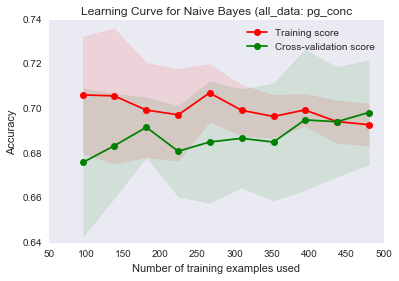

In [199]:
plot_learning_curve(nbayes, 'Learning Curve for Naive Bayes (all_data: pg_conc', Xnb_train, ynb_train, cv=cv_nb);

## 7) What's the best performance you can get with Logistic Regression? Is LR a good choice for this dataset?

- Best Accuracy:  (Tied for 1st place) 76.16% with all_data and data_small (3) 74.83% with datar
- Speed: (1) 30.7 microsec per loop with datar (2) 31.2 microsec per loop with all_data (3) 31.3 microsec per loop with small_data
- Tested: all_data
- Interpretability: Not the simplest to explain (linear regression or kNN), but could be worse (Random Forests).
<br><br>
**Is LR a good choice for this dataset?** Yes, because we are predicting a binary outcome and do not have a ton of features. We can also calculate probabilities to support how confident we are in a prediction, when using LR. Further, it performed better than benchmark. Grid search suggested I use Lasso for best performance, which I did, and is the easier to explain than Ridge. But I was surprised, because it appears none of the features were dropped (I guess all are relevant). Finally, learning curves reveal bias and some variance.

In [200]:
# import and create logistic regresstion
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [277]:
# tune params via gridsearch --> for all_data
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight':['auto', None], 'penalty': ['l1', 'l2']} 
clflr1 = GridSearchCV(logreg, parameters, cv=cv1)
clflr1.fit(X_train_std1, y_train1)

GridSearchCV(cv=ShuffleSplit(601, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['auto', None]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [305]:
# best params for all_data
clflr1.best_params_

{'C': 1010.1010199999999, 'class_weight': None, 'penalty': 'l1'}

In [273]:
clflr1.best_score_

0.77520661157024795

In [274]:
clflr1.best_estimator_

LogisticRegression(C=1010.1010199999999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [275]:
best_lr1 = clflr1.best_estimator_

In [276]:
# tune params via gridsearch --> for datar
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight':['auto', None], 'penalty': ['l1', 'l2']} 
clflr2 = GridSearchCV(logreg, parameters, cv=cv2)
clflr2.fit(X_train_std2, y_train2)

GridSearchCV(cv=ShuffleSplit(601, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['auto', None]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [279]:
# best params for datar
clflr2.best_params_

{'C': 4040.4040500000001, 'class_weight': None, 'penalty': 'l1'}

In [280]:
clflr2.best_score_

0.77355371900826442

In [281]:
clflr2.best_estimator_

LogisticRegression(C=4040.4040500000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [282]:
best_lr2 = clflr2.best_estimator_

In [283]:
# tune params via gridsearch --> for data_small
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight':['auto', None], 'penalty': ['l1', 'l2']} 
clflr3 = GridSearchCV(logreg, parameters, cv=cv3)
clflr3.fit(X_train_std3, y_train3)

GridSearchCV(cv=ShuffleSplit(601, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': ['auto', None]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [284]:
# best params for data_small
clflr3.best_params_

{'C': 1010.1010199999999, 'class_weight': None, 'penalty': 'l1'}

In [285]:
clflr3.best_score_

0.77685950413223137

In [286]:
clflr3.best_estimator_

LogisticRegression(C=1010.1010199999999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [287]:
best_lr3 = clflr3.best_estimator_

In [307]:
# fit logreg model with best params
best_lr1.fit(X_train_std2, y_train2)

LogisticRegression(C=1010.1010199999999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [292]:
# check on the scores of the three:
#all_data
best_lr1.score(X_test_std1, y_test1)

0.76158940397350994

In [214]:
# timing all_data time
%timeit best_lr1.predict(X_test_std1)

The slowest run took 4.18 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 31.1 µs per loop


In [293]:
best_lr2.fit(X_train_std2, y_train2)

LogisticRegression(C=4040.4040500000001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [294]:
#datar
best_lr2.score(X_test_std2, y_test2)

0.7483443708609272

In [216]:
# timing datar
%timeit best_lr2.predict(X_test_std2)

The slowest run took 7.81 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 31.1 µs per loop


In [295]:
best_lr3.fit(X_train_std3, y_train3)

LogisticRegression(C=1010.1010199999999, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0)

In [296]:
#data_small
best_lr3.score(X_test_std3, y_test3)

0.76158940397350994

In [218]:
# timing data_small time
%timeit best_lr3.predict(X_test_std3)

The slowest run took 7.75 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 31 µs per loop


In [297]:
# farther from zero --> more important
# all_data --> preg, bmi, diabetes_pf
pd.DataFrame({'features': X_train1.columns, 'coefficients': best_lr1.coef_[0]})

,coefficients,features
0,0.437403,preg
1,1.130061,pg_conc
2,-0.055129,diastolic_bp
3,-0.001436,skin
4,-0.066666,serum_insulin
5,0.608416,bmi
6,0.386527,diabetes_pf
7,0.130264,age


In [298]:
# farther from zero --> more important
# datar --> preg, bmi, diabetes_pf
pd.DataFrame({'features': X_train2.columns, 'coefficients': best_lr2.coef_[0]})

,coefficients,features
0,0.437258,preg
1,1.231652,pg_conc
2,-0.057273,diastolic_bp
3,0.006790,skin
4,-0.215083,serum_insulin
5,0.606032,bmi
6,0.409045,diabetes_pf
7,0.128015,age
8,-0.299529,ratio


In [299]:
# farther from zero --> more important
# data_small --> preg, bmi, diabetes_pf
pd.DataFrame({'features': X_train3.columns, 'coefficients': best_lr3.coef_[0]})

,coefficients,features
0,0.439341,preg
1,1.099972,pg_conc
2,-0.050896,diastolic_bp
3,-0.003130,skin
4,0.600514,bmi
5,0.381312,diabetes_pf
6,0.130972,age


In [300]:
# get ready to plot learning curves for logistic regression
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(best_lr1, X_train_std1, y_train1, cv=cv1)

(array([ 48, 156, 264, 372, 480]),
 array([[ 0.89583333,  0.8125    ,  0.8125    ,  0.77083333,  0.70833333,
          0.8125    ,  0.77083333,  0.77083333,  0.91666667,  0.89583333],
        [ 0.78205128,  0.74358974,  0.75      ,  0.79487179,  0.78846154,
          0.75      ,  0.76923077,  0.75641026,  0.74358974,  0.74358974],
        [ 0.79166667,  0.76893939,  0.76136364,  0.8030303 ,  0.79924242,
          0.76515152,  0.78030303,  0.79545455,  0.75757576,  0.78030303],
        [ 0.77150538,  0.7688172 ,  0.77150538,  0.80376344,  0.79032258,
          0.78494624,  0.7688172 ,  0.77419355,  0.77956989,  0.7688172 ],
        [ 0.78333333,  0.77291667,  0.77083333,  0.78125   ,  0.77916667,
          0.77916667,  0.79583333,  0.77916667,  0.78333333,  0.78333333]]),
 array([[ 0.70247934,  0.7768595 ,  0.80991736,  0.7107438 ,  0.76033058,
          0.75206612,  0.7107438 ,  0.71900826,  0.67768595,  0.66942149],
        [ 0.78512397,  0.81818182,  0.7768595 ,  0.73553719,  0.75206

In [301]:
def plot_learning_curve(estimator, title, X1, y1, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X1 : our training dataframe

    y1 : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv1 (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X3, y3, cv=cv3, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

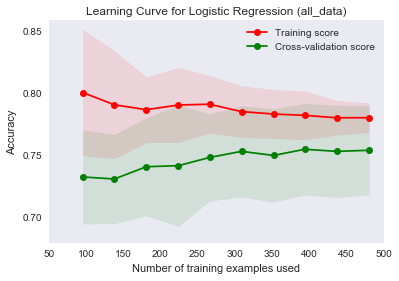

In [302]:
plot_learning_curve(best_lr1, 'Learning Curve for Logistic Regression (all_data)', X_train_std1, y_train1, cv=cv1);

## 8) What's the best performance you can get with Random Forest? Is RF a good choice for this dataset?

- Best Accuracy:  (1) 75.5% with data_small (2) 74.83% with datar (3) 74.17% with all_data
- Speed: (1) 2.86 ms per loop with data_small (2) 3.81 ms per loop with datar (3) 5.15 ms per loop with all_data
- Tested: data_small
- Interpretability: Pretty complex, especially compared to its simple family member:  the Decision Tree.
<br><br>
**Is RF a good choice for this dataset?** Yes, because it helps us learn important features and the data's relationship is pretty complex (definitely not linear). On the learning curves, there is some some variance (but the highest training set performance).

In [227]:
# import and create random forest
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()

In [228]:
# find best params - first for all_data
parameters = {'n_estimators': range(1, 100, 10)}
clfrf1 = GridSearchCV(rfmodel, parameters, cv=cv1)

In [229]:
clfrf1.fit(X_train1, y_train1)
clfrf1.best_params_

{'n_estimators': 41}

In [308]:
clfrf1.best_score_

0.75619834710743805

In [230]:
clfrf1.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [231]:
best_rf1 = clfrf1.best_estimator_

In [232]:
# find best params - now for datar
parameters = {'n_estimators': range(1, 100, 10)}
clfrf2 = GridSearchCV(rfmodel, parameters, cv=cv2)

In [233]:
clfrf2.fit(X_train2, y_train2)
clfrf2.best_params_

{'n_estimators': 81}

In [309]:
clfrf2.best_score_

0.75619834710743805

In [234]:
clfrf2.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=81, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [235]:
best_rf2 = clfrf2.best_estimator_

In [236]:
# find best params - finally, for data_small
parameters = {'n_estimators': range(1, 100, 10)}
clfrf3 = GridSearchCV(rfmodel, parameters, cv=cv3)

In [237]:
clfrf3.fit(X_train3, y_train3)
clfrf3.best_params_

{'n_estimators': 41}

In [310]:
clfrf3.best_score_

0.7528925619834711

In [238]:
clfrf3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [239]:
best_rf3 = clfrf3.best_estimator_

In [240]:
# Evaluate the Random Forest model using cross-validation (for all_data)
from sklearn.cross_validation import cross_val_score

scores1 = cross_val_score(rfmodel, X_train1, y_train1, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores1, scores1.mean()))

CV accuracy [ 0.75621891  0.73134328  0.73869347], Average accuracy 0.742085218797


In [241]:
# check on the scores of the three:
#all_data
best_rf1.score(X_test1, y_test1)

0.75496688741721851

In [242]:
# timing - all_data
%timeit best_rf1.predict(X_test1)

100 loops, best of 3: 2.64 ms per loop


In [243]:
# cv eval --> datar
scores2 = cross_val_score(rfmodel, X_train2, y_train2, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores2, scores2.mean()))

CV accuracy [ 0.74626866  0.69651741  0.77386935], Average accuracy 0.738885138795


In [244]:
# datar
best_rf2.score(X_test2, y_test2)

0.7483443708609272

In [245]:
# timing - datar
%timeit best_rf2.predict(X_test2)

100 loops, best of 3: 4.95 ms per loop


In [246]:
# cv eval --> data_small
scores3 = cross_val_score(rfmodel, X_train3, y_train3, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores3, scores3.mean()))

CV accuracy [ 0.75124378  0.72139303  0.75879397], Average accuracy 0.743810261923


In [247]:
# data_small
best_rf3.score(X_test3, y_test3)

0.76158940397350994

In [248]:
# timing - data_small
%timeit best_rf3.predict(X_test3)

100 loops, best of 3: 2.57 ms per loop


In [249]:
# get ready to plot learning curves for random forests
from sklearn.learning_curve import learning_curve
title = 'title'
learning_curve(best_rf3, X_train3, y_train3, cv=cv3)

(array([ 48, 156, 264, 372, 480]),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.99621212,  1.        ,  0.99621212,  1.        ,  1.        ,
          0.99621212,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.99462366,  1.        ,  1.        ,  1.        ,  0.99731183,
          1.        ,  0.99731183,  1.        ,  0.99731183,  1.        ],
        [ 0.99791667,  1.        ,  1.        ,  0.99791667,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]),
 array([[ 0.72727273,  0.83471074,  0.78512397,  0.6446281 ,  0.65289256,
          0.76033058,  0.71900826,  0.7768595 ,  0.72727273,  0.62809917],
        [ 0.76033058,  0.76033058,  0.80165289,  0.73553719,  0.68595

In [250]:
def plot_learning_curve(estimator, title, X3, y3, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X3 : our training dataframe

    y3 : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv3 (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X3, y3, cv=cv3, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

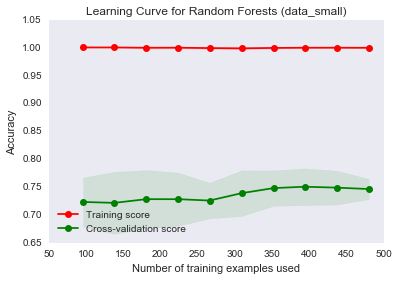

In [251]:
plot_learning_curve(best_rf3, 'Learning Curve for Random Forests (data_small)', X_train3, y_train3, cv=cv3);

In [252]:
# Use RF to find most important features - will do this for each dataframe
features = X1.columns
feature_importances = best_rf1.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
1,pg_conc,0.245166
5,bmi,0.146127
6,diabetes_pf,0.137316
7,age,0.135608
4,serum_insulin,0.093996
2,diastolic_bp,0.085085
3,skin,0.078465
0,preg,0.078238


In [253]:
features = X2.columns
feature_importances = best_rf2.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
1,pg_conc,0.250571
5,bmi,0.145784
6,diabetes_pf,0.122474
7,age,0.114577
8,ratio,0.092456
4,serum_insulin,0.078208
2,diastolic_bp,0.069901
0,preg,0.066496
3,skin,0.059533


In [254]:
features = X3.columns
feature_importances = best_rf3.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
1,pg_conc,0.289127
4,bmi,0.173654
5,diabetes_pf,0.147253
6,age,0.138463
0,preg,0.088299
2,diastolic_bp,0.085159
3,skin,0.078045


## 9) If you could only choose one, which classifer from the above that you already ran is best? How do you define best? (hint: could be prediction accuracy, running time, interpretability, etc)

Since we are dealing with people's health, I am most concerned with accuracy over speed or interpretability. It would be interesting to do this again with recall.

kNN, Logistic Regression, and Random Forest all performed similarly enough in the mid-seventy percent range that I would consider them all. However, Logistic Regression was very speedy, had the highest accuracy (tied with kNN at 76.16%), but has the added bonus of allowing one to calculate confidence probabilities for predictions--which seems potentially handy when dealing with the medical field.